## Importing the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Ignoring all warnings
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
data = pd.read_csv('Bengaluru_House_Data.csv', encoding = 'cp1252')

In [3]:
data.shape

(13320, 13)

In [4]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07,NaN,NaN,NaN,NaN
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00,NaN,NaN,NaN,NaN
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00,NaN,NaN,NaN,NaN
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00,NaN,NaN,NaN,NaN
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00,NaN,NaN,NaN,NaN


###### The shape shows that there are 4 extra columns compared to the Data Structure provided. Having a look at the top 5 rows, 4 Unnamed columns are found which need to be handled.

In [5]:
data.info()  # Getting basic information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  object 
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
dtypes: float64(6), object(7)
memory usage: 1.3+ MB


###### We can see that the Unnamed columns have all values as null. These columns may have been added by mistake and should be dropped.
###### There are other columns too with null values. Also the data types of some columns is not what we expect, like total_sqft should be numeric but is shown as object. Price column should also have the currency symbol handled.

In [6]:
data.describe()  # Statistical description for numeric data

,bath,balcony,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
count,13247.000000,12711.000000,0.0,0.0,0.0,0.0
mean,2.692610,1.584376,NaN,NaN,NaN,NaN
std,1.341458,0.817263,NaN,NaN,NaN,NaN
min,1.000000,0.000000,NaN,NaN,NaN,NaN
25%,2.000000,1.000000,NaN,NaN,NaN,NaN
50%,2.000000,2.000000,NaN,NaN,NaN,NaN
75%,3.000000,2.000000,NaN,NaN,NaN,NaN
max,40.000000,3.000000,NaN,NaN,NaN,NaN


###### Some values in the data seem to be a bit extreme like bath being 40. Having 40 bathrooms is possible but it can also be a case of mistyping.

In [7]:
data.describe(include = ['O'])  # Statistical description for object type data

,area_type,availability,location,size,society,total_sqft,price
count,13320,13320,13319,13304,7818,13320,13320
unique,4,81,1305,31,2688,2117,2205
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,75
freq,8790,10581,540,5199,80,843,303


In [8]:
len(data[data['availability'] == 'Ready To Move']) / len(data['availability']) * 100

79.43693693693695

###### Almost 80% of the values in column 'availability' is 'Ready to Move', so all other values can be merged after further evaluation.

In [9]:
# Checking the unique values in each column
for i in data.columns:
    print(f'Unique values in {i} are:', data[i].unique(), sep = '\n')
    print('--------------------------------------------------------')

Unique values in area_type are:
['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
--------------------------------------------------------
Unique values in availability are:
['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']
--------------------------------------------

###### The nan values need to be handled and the range in 'total sqft' column too. Columns 'bath' and 'balcony' should be converted to integer.

In [10]:
# Checking the value counts for each column
for i in data.columns:
    print(f'Counts of each unique value in {i} are:', data[i].value_counts(), sep = '\n')
    print('----------------------------------------------------------------------------')

Counts of each unique value in area_type are:
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
----------------------------------------------------------------------------
Counts of each unique value in availability are:
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
----------------------------------------------------------------------------
Counts of each unique value in location are:
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                     

In [11]:
data.duplicated().sum()  # To check the number of duplicate rows

511

## Data Cleaning for EDA

In [12]:
# Creating separate datasets for EDA and modelling to maintain data integrity
eda_df = data.copy()

In [13]:
# Dropping the 'Unnamed' columns
eda_df.drop(['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'], axis = 1, inplace = True)

In [14]:
eda_df.shape

(13320, 9)

In [15]:
eda_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00


### Treating the missing values

In [16]:
for i in eda_df.columns:
    print(f'Percentage of missing values in {i} are:', (len(eda_df[eda_df[i].isna()]) / eda_df.shape[0] * 100))

Percentage of missing values in area_type are: 0.0
Percentage of missing values in availability are: 0.0
Percentage of missing values in location are: 0.0075075075075075074
Percentage of missing values in size are: 0.12012012012012012
Percentage of missing values in society are: 41.306306306306304
Percentage of missing values in total_sqft are: 0.0
Percentage of missing values in bath are: 0.5480480480480481
Percentage of missing values in balcony are: 4.572072072072072
Percentage of missing values in price are: 0.0


###### The column 'society' has more than 41% values as nan, such high number of values shouldn't be imputed because it will change the distribution of data completely. On further thought, these null values can be because of the property not present in society.
###### The other columns having nan values can be imputed with mode because 'bath' and 'balcony' are also categorical columns.

In [17]:
import statistics
for column in ['location', 'size', 'bath', 'balcony']:
    eda_df[column].fillna(statistics.mode(data[column]), inplace = True)

In [18]:
# Number of unique values in society column
eda_df['society'].nunique() / eda_df['society'].notna().sum() * 100

34.38219493476593

###### This shows that more than 34% of the column society has unique values. Hence there is very little information gained from this column.

In [19]:
# Filling null values with 'Not in society'
eda_df['society'].fillna('Not in society', inplace = True)

In [20]:
# Filling all other values with 'In society' because very little information gained from column
eda_df['society'] = eda_df['society'].apply(lambda x : 'In society' if x != 'Not in society' else x)

In [21]:
eda_df['society'].unique()

array(['In society', 'Not in society'], dtype=object)

In [22]:
for i in eda_df.columns:
    print(f'Counts of each unique value in {i} are:', eda_df[i].value_counts(), sep = '\n')
    print('----------------------------------------------------------------------------')

Counts of each unique value in area_type are:
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
----------------------------------------------------------------------------
Counts of each unique value in availability are:
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
----------------------------------------------------------------------------
Counts of each unique value in location are:
Whitefield                        541
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                     

In [23]:
for i in eda_df.columns:
    print(f'Percentage of missing values in {i} are:', (len(eda_df[eda_df[i].isna()]) / eda_df.shape[0] * 100))

Percentage of missing values in area_type are: 0.0
Percentage of missing values in availability are: 0.0
Percentage of missing values in location are: 0.0
Percentage of missing values in size are: 0.0
Percentage of missing values in society are: 0.0
Percentage of missing values in total_sqft are: 0.0
Percentage of missing values in bath are: 0.0
Percentage of missing values in balcony are: 0.0
Percentage of missing values in price are: 0.0


### Handling datatypes

#### Availability column

In [24]:
eda_df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [25]:
# Replacing 'Immediate Possession' values with 'Ready To Move'
eda_df['availability'].replace(to_replace = 'Immediate Possession', value = 'Ready To Move', inplace = True)

In [26]:
eda_df['Date_of_Availability'] = eda_df['availability']

In [27]:
eda_df['availability'] = eda_df['availability'].apply(lambda x : 'Not Ready To Move' if x != 'Ready To Move' else x)

In [28]:
eda_df['availability'].unique()

array(['Not Ready To Move', 'Ready To Move'], dtype=object)

In [29]:
eda_df['Date_of_Availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       '19-May', '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct',
       '21-Jan', '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul',
       '21-Nov', '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep',
       '21-Aug', '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun',
       '17-Feb', '20-Nov', '20-Jul', '16-Sep', '15-Oct', '15-Dec',
       '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov', '20-Apr',
       '16-Jan', '14-Jul'], dtype=object)

In [30]:
from datetime import datetime
eda_df['Date_of_Availability'] = eda_df['Date_of_Availability'].apply(lambda x : pd.to_datetime(datetime.strftime
        (datetime.strptime(x, '%d-%b'), '%Y-%m-%d')) if x != 'Ready To Move' else x)

In [31]:
eda_df['Date_of_Availability'].unique()

array([Timestamp('1900-12-19 00:00:00'), 'Ready To Move',
       Timestamp('1900-05-18 00:00:00'), Timestamp('1900-02-18 00:00:00'),
       Timestamp('1900-11-18 00:00:00'), Timestamp('1900-12-20 00:00:00'),
       Timestamp('1900-10-17 00:00:00'), Timestamp('1900-12-21 00:00:00'),
       Timestamp('1900-09-19 00:00:00'), Timestamp('1900-09-20 00:00:00'),
       Timestamp('1900-03-18 00:00:00'), Timestamp('1900-02-20 00:00:00'),
       Timestamp('1900-04-18 00:00:00'), Timestamp('1900-08-20 00:00:00'),
       Timestamp('1900-10-18 00:00:00'), Timestamp('1900-03-19 00:00:00'),
       Timestamp('1900-09-17 00:00:00'), Timestamp('1900-12-18 00:00:00'),
       Timestamp('1900-08-17 00:00:00'), Timestamp('1900-04-19 00:00:00'),
       Timestamp('1900-06-18 00:00:00'), Timestamp('1900-12-22 00:00:00'),
       Timestamp('1900-01-22 00:00:00'), Timestamp('1900-08-18 00:00:00'),
       Timestamp('1900-01-19 00:00:00'), Timestamp('1900-07-17 00:00:00'),
       Timestamp('1900-07-18 00:00:00'), T

In [32]:
eda_df['Day_of_Availability'] = eda_df['Date_of_Availability'].apply(lambda x : x.day if x != 'Ready To Move' else 0)
eda_df['Month_of_Availability'] = eda_df['Date_of_Availability'].apply(lambda x : x.month if x != 'Ready To Move' else 0)

In [33]:
eda_df.drop(['Date_of_Availability'], inplace = True, axis = 1)

###### Now 'Day_of_Availability' and 'Month_of_Availability' columns contain the day and month of availability and 'availability' contains 2 categories: Ready to Move or not.

#### Size column

In [34]:
eda_df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [35]:
eda_df['size'] = eda_df['size'].str.slice(0, 2).astype(int)  # Converting size column to number of bedrooms

In [36]:
eda_df['size'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

#### Total_sqft column

In [37]:
eda_df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [38]:
len(eda_df[eda_df['total_sqft'].str.contains('-')])

201

In [39]:
# Converting the values containing range of numbers to a single float number which is the midpoint of the range
eda_df['total_sqft'] = eda_df['total_sqft'].str.findall('(\d+)')  # Returns list of all numbers
eda_df['total_sqft'] = eda_df['total_sqft'].apply(lambda x : np.mean(np.array(x).astype(float)))  # Getting mean of those numbers

#### Bath and balcony columns

In [40]:
# Converting the columns containing integer values from float to int
eda_df['bath'] = eda_df['bath'].astype(int)
eda_df['balcony'] = eda_df['balcony'].astype(int)

#### Price column

In [41]:
# Separating currency symbol to a different column
eda_df[['currency', 'price']] = eda_df['price'].str.extract(r'(\D*)(\d.*)')

In [42]:
# Converting price to a single float number
eda_df['price'] = eda_df['price'].str.findall('(\d*\.*\d+)')
eda_df['price'] = eda_df['price'].apply(lambda x : np.mean(np.array(x).astype(float)))

In [43]:
eda_df['currency'] = eda_df['currency'].str.strip()

In [44]:
eda_df['currency'].value_counts()

     12985
?      202
€      110
$       23
Name: currency, dtype: int64

In [45]:
len(eda_df[eda_df['currency'] == '']) / eda_df.shape[0] * 100

97.48498498498499

###### As almost 97.5% of the values don't have a currency symbol attached, we can drop the values containing currency symbol and remove the currency column itself.

In [46]:
eda_df.drop(eda_df[eda_df['currency'] != ''].index, inplace = True, axis = 0)

In [47]:
eda_df.drop(['currency'], inplace = True, axis = 1)

In [48]:
eda_df.drop_duplicates(inplace = True)  # Duplicate rows dropped

In [49]:
eda_df.shape

(12467, 11)

In [50]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12467 entries, 14 to 13318
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area_type              12467 non-null  object 
 1   availability           12467 non-null  object 
 2   location               12467 non-null  object 
 3   size                   12467 non-null  int32  
 4   society                12467 non-null  object 
 5   total_sqft             12467 non-null  float64
 6   bath                   12467 non-null  int32  
 7   balcony                12467 non-null  int32  
 8   price                  12467 non-null  float64
 9   Day_of_Availability    12467 non-null  int64  
 10  Month_of_Availability  12467 non-null  int64  
dtypes: float64(2), int32(3), int64(2), object(4)
memory usage: 1022.7+ KB


In [51]:
eda_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Day_of_Availability,Month_of_Availability
14,Plot Area,Ready To Move,Sarjapur,3,In society,2250.0,3,2,149.000,0,0
24,Super built-up Area,Not Ready To Move,Thanisandra,1,In society,510.0,1,0,27.625,18,11
25,Super built-up Area,Not Ready To Move,Mangammanapalya,3,Not in society,1250.0,3,2,56.000,18,5
26,Super built-up Area,Ready To Move,Electronic City,2,In society,660.0,1,1,23.100,0,0
27,Built-up Area,Not Ready To Move,Whitefield,3,Not in society,1610.0,3,2,81.000,20,12


###### The data now looks ready for EDA.

# EDA

## Univariate Analysis

### Price column (Target)

In [52]:
eda_df['price'].value_counts()

75.000     293
65.000     284
55.000     259
60.000     255
45.000     228
          ... 
34.560       1
65.110       1
73.595       1
76.450       1
488.000      1
Name: price, Length: 1963, dtype: int64

In [53]:
eda_df['price'].describe()

count    12467.000000
mean       117.933472
std        407.248812
min          8.000000
25%         50.000000
50%         73.000000
75%        122.000000
max      42278.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

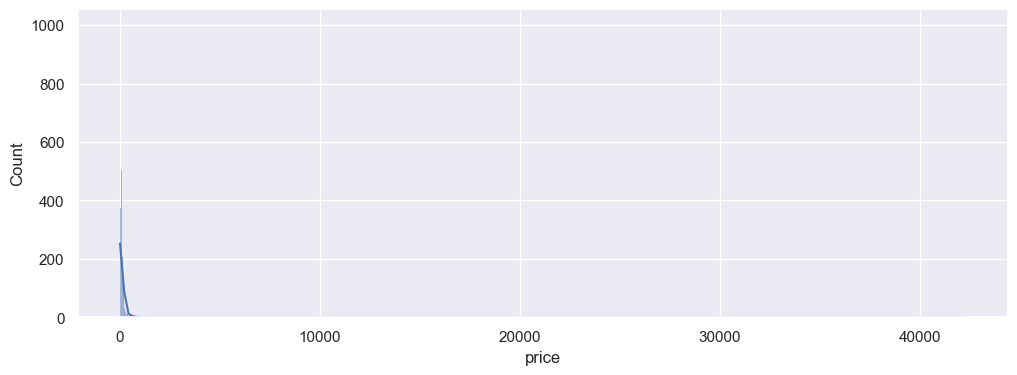

In [54]:
plt.figure(figsize = (12, 4))
sns.histplot(eda_df['price'], kde = True)

<AxesSubplot:xlabel='price'>

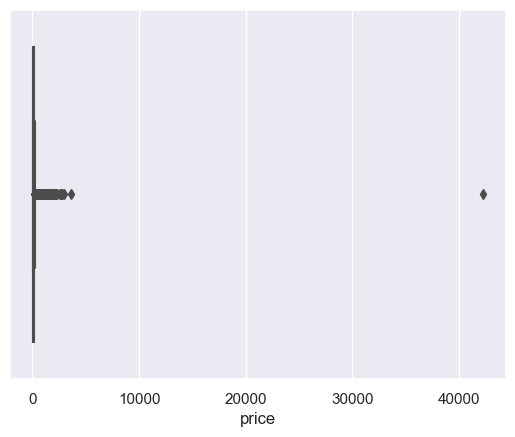

In [55]:
sns.boxplot(eda_df['price'])

###### There is clearly a very far outlier in our target column 'price'. This should be imputed with median.

In [56]:
eda_df['price'] = np.where(eda_df['price'] > 40000, eda_df['price'].median(), eda_df['price'])

<AxesSubplot:xlabel='price'>

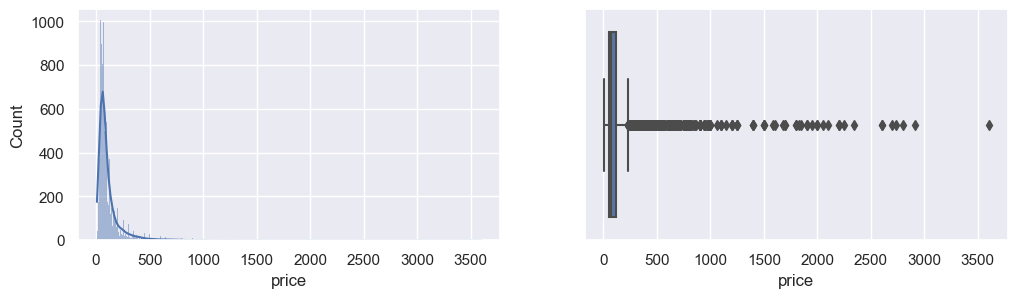

In [57]:
plt.figure(figsize = (12, 3))
plt.subplot(1, 2, 1)
sns.histplot(eda_df['price'], kde = True)
plt.subplot(1, 2, 2)
sns.boxplot(eda_df['price'])

###### The column 'price' is highly right skewed. Thus the frequency of houses with low price is more.

### Area_type column

In [58]:
eda_df['area_type'].value_counts()

Super built-up  Area    8107
Built-up  Area          2331
Plot  Area              1943
Carpet  Area              86
Name: area_type, dtype: int64

<AxesSubplot:xlabel='area_type', ylabel='count'>

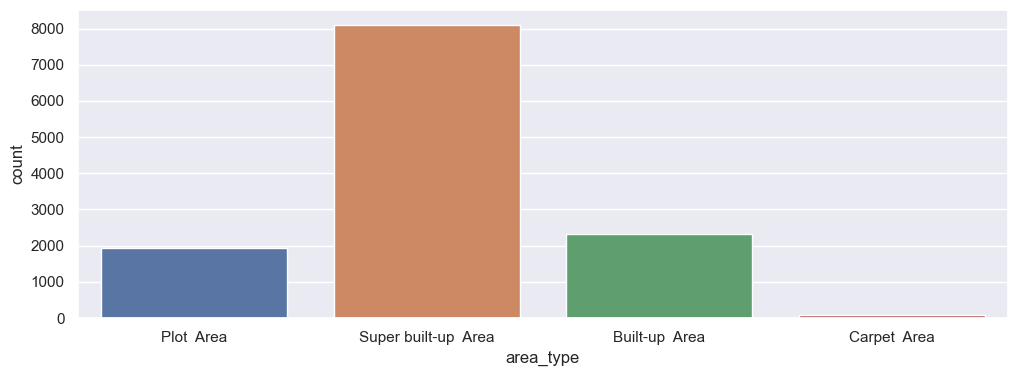

In [59]:
plt.figure(figsize = (12, 4))
sns.countplot(eda_df['area_type'])

###### The most common area type is Super built-up area.

### Availability column

In [60]:
eda_df['availability'].value_counts()

Ready To Move        9924
Not Ready To Move    2543
Name: availability, dtype: int64

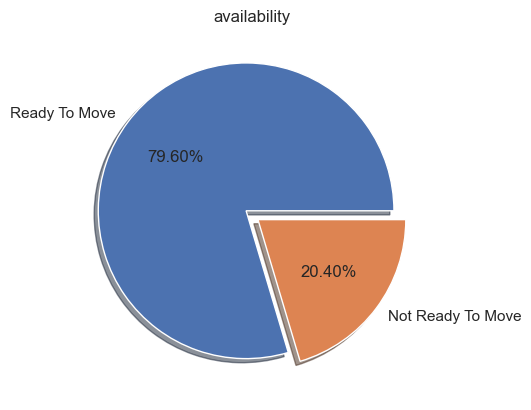

In [61]:
plt.pie(eda_df['availability'].value_counts(), autopct = '%.2f%%', labels=['Ready To Move', 'Not Ready To Move'], 
        explode=[0.05, 0.05], shadow = True)
plt.title('availability')
plt.show()

###### Almost 80% of the people are ready to move in the property which may be due to the current price being less or some urgency to move. Date of availability of remaining people is stored in other columns.

### Location column

In [62]:
eda_df['location'].value_counts()

Whitefield                        515
Sarjapur  Road                    368
Electronic City                   271
Kanakpura Road                    239
Thanisandra                       221
                                 ... 
asha township, off hennur road      1
Escorts Colony                      1
Rahat Bagh                          1
Chokkasandra                        1
Abshot Layout                       1
Name: location, Length: 1296, dtype: int64

In [63]:
(eda_df['location'].value_counts() > 25).sum()

111

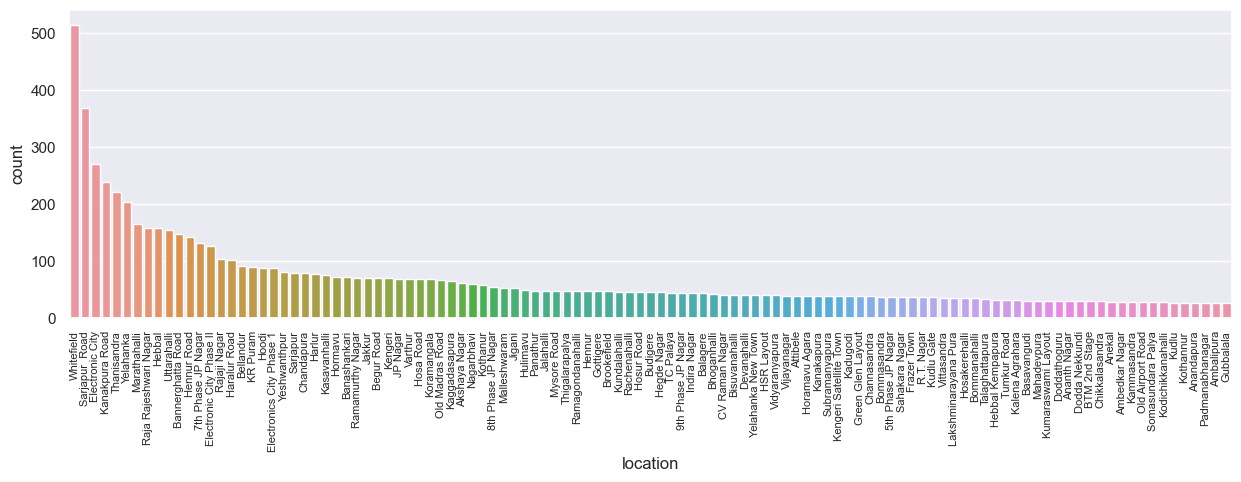

In [64]:
plt.figure(figsize = (15, 4))
labels = eda_df['location'].value_counts()[eda_df['location'].value_counts() > 25].index
ax = sns.countplot(eda_df['location'], order = labels)
ax.tick_params(axis = 'x',labelsize = 8, labelrotation = 90)

###### The column 'location' contains 1296 different locations of which Whitefield is the most common.

### Size column

In [65]:
eda_df['size'].value_counts()

2     5127
3     4525
4     1369
1      629
5      343
6      214
7       96
8       85
9       53
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: size, dtype: int64

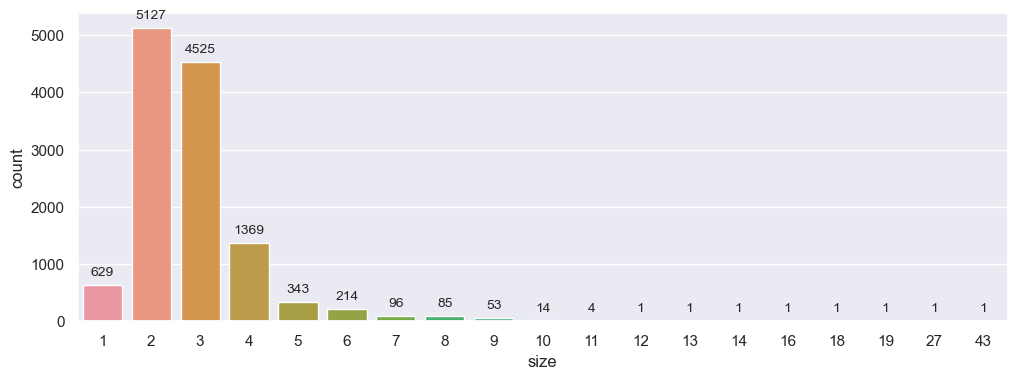

In [66]:
plt.figure(figsize = (12, 4))
ax = sns.countplot(eda_df['size'])

# Getting labels on top of bars to better visualise the categories with very less count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=10)

###### This shows that the most common size of property is having 1 to 4 bedrooms and that it's extremely rare to find ones with 10 bedrooms or more. This may be due to less demand of such huge properties.

### Society column

In [67]:
eda_df['society'].value_counts()

In society        7269
Not in society    5198
Name: society, dtype: int64

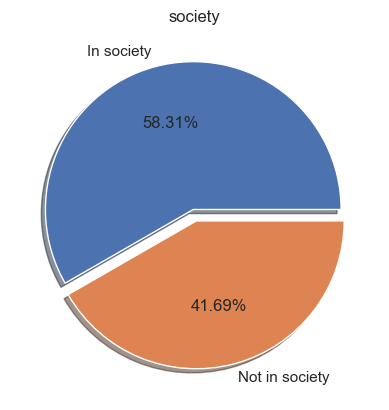

In [68]:
plt.pie(eda_df['society'].value_counts(), autopct = '%.2f%%', labels=['In society', 'Not in society'], explode=[0.04, 0.04]
        , shadow = True)
plt.title('society')
plt.show()

###### This shows that more properties are present in societies compared to those not in society. This may be because of the demand from people to live in a society.

### Total_sqft column

In [69]:
eda_df['total_sqft'].value_counts()

1200.0    784
1100.0    207
1500.0    199
2400.0    194
600.0     174
         ... 
2383.0      1
3080.0      1
787.0       1
6613.0      1
4689.0      1
Name: total_sqft, Length: 1975, dtype: int64

<AxesSubplot:xlabel='total_sqft', ylabel='Count'>

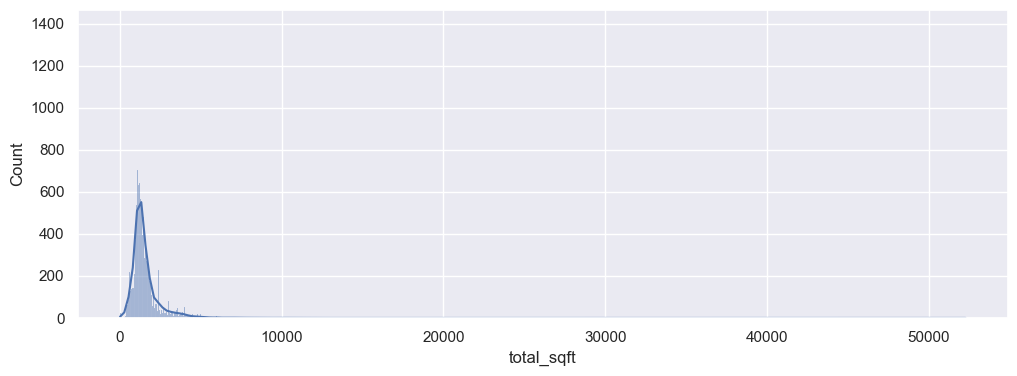

In [70]:
plt.figure(figsize = (12, 4))
sns.histplot(eda_df['total_sqft'], kde = True)

<AxesSubplot:xlabel='total_sqft'>

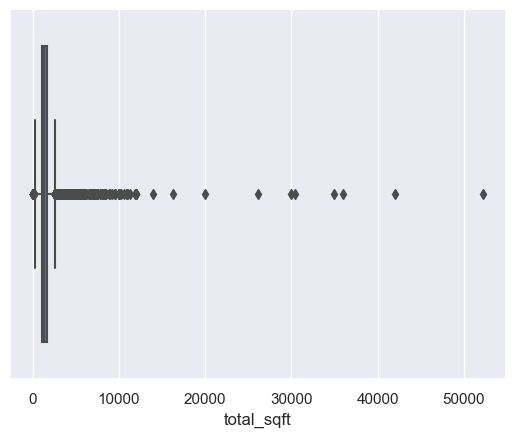

In [71]:
sns.boxplot(eda_df['total_sqft'])

###### There are outliers present in total_sqft column which can be treated before modelling. This column is not too skewed but still has right skewness. The most common values in this column are around 1000-1500 sqft.

### Bath column

In [72]:
eda_df['bath'].unique()

array([ 3,  1,  2,  4,  9,  5,  8,  7,  6, 11, 10, 14, 27, 12, 16, 40, 15,
       13, 18])

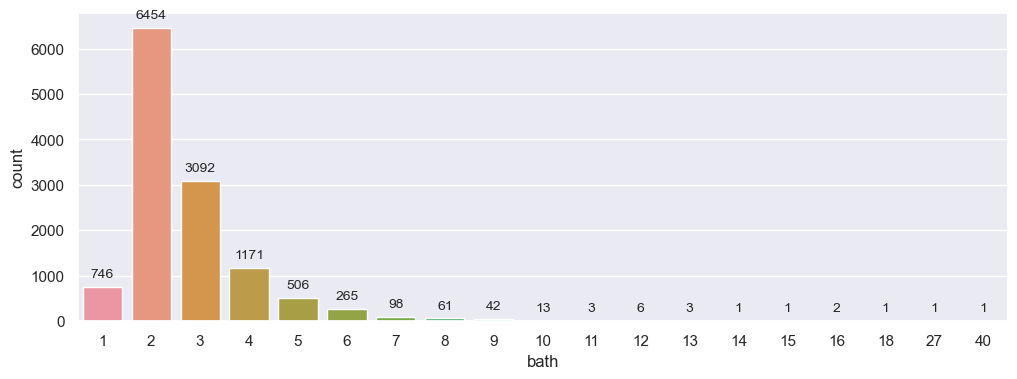

In [73]:
plt.figure(figsize = (12, 4))
ax = sns.countplot(eda_df['bath'])

# Getting labels on top of bars to better visualise the categories with very less count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=10)

###### This column's distribution is somewhat similar to that of size column, which is logical because no. of bathrooms often depends on the no. of bedrooms. The most common no. of bathrooms is 1 to 4 and that it's extremely rare to find ones with 10 bathrooms or more.

### Balcony column

In [74]:
eda_df['balcony'].unique()

array([2, 0, 1, 3])

<AxesSubplot:xlabel='balcony', ylabel='count'>

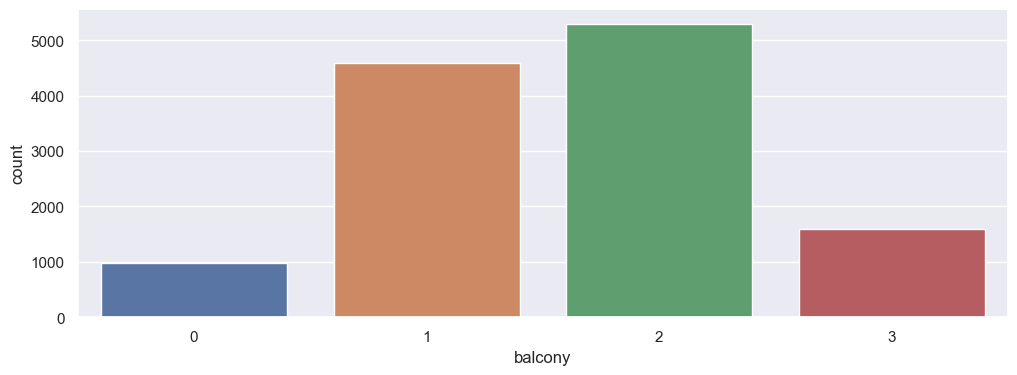

In [75]:
plt.figure(figsize = (12, 4))
sns.countplot(eda_df['balcony'])

###### This shows that it is most common to have 1-2 balconies. Having 3 or no balconies is also a possibility but not more than 3.

### Day_of_Availability column

In [76]:
eda_df['Day_of_Availability'].value_counts() 

0     9924
18    1579
19     435
20     170
21     163
17     125
22      49
16      13
15       7
14       2
Name: Day_of_Availability, dtype: int64

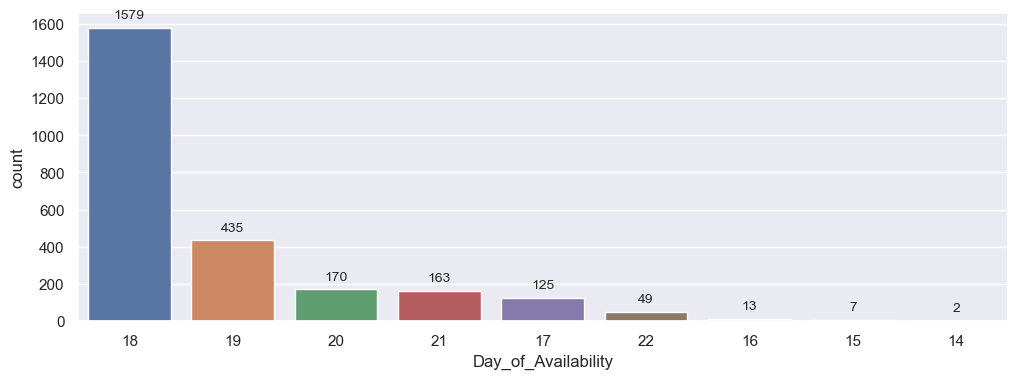

In [77]:
plt.figure(figsize = (12, 4))
# Value 0 is removed because that indicates 'Ready to Move' and does not represent day of month
labels = eda_df['Day_of_Availability'].value_counts()[eda_df['Day_of_Availability'].value_counts() < 5000].index
ax = sns.countplot(eda_df['Day_of_Availability'], order = labels)

# Getting labels on top of bars to better visualise the categories with very less count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=10)

###### It can be observed that those people who aren't ready to move, become available between 14th and 22nd of the month. This may be due to the reduced price on these dates. We need to look into it.

### Month_of_Availability column

In [78]:
eda_df['Month_of_Availability'].value_counts()

0     9924
12     665
5      329
4      292
3      234
8      230
7      187
6      186
1      109
10      86
11      76
9       76
2       73
Name: Month_of_Availability, dtype: int64

<AxesSubplot:xlabel='Month_of_Availability', ylabel='count'>

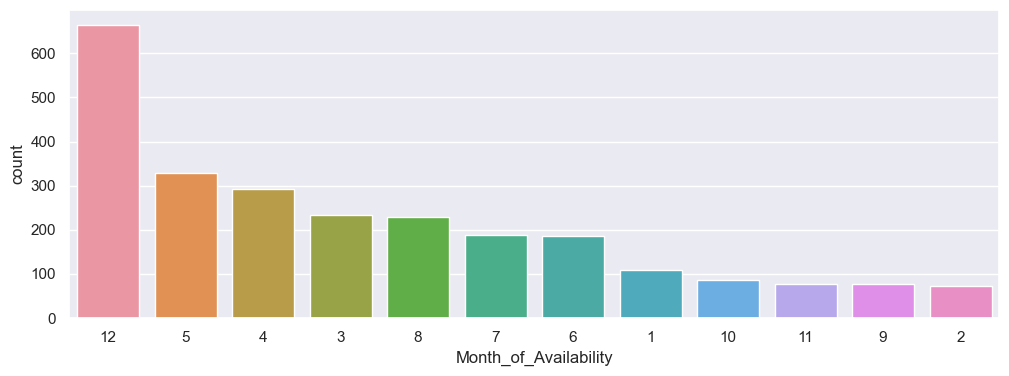

In [79]:
plt.figure(figsize = (12, 4))
# Value 0 is removed because that indicates 'Ready to Move' and does not represent month number
labels = eda_df['Month_of_Availability'].value_counts()[eda_df['Month_of_Availability'].value_counts() < 5000].index
sns.countplot(eda_df['Month_of_Availability'], order = labels)

###### It can be observed that most people who aren't ready to move, become available on December(12) or from March to May(3-5). This may be due to summer vacations / end of exams for children from March to May or due to Christmas holidays in December, giving people time to relocate.

## Bivariate Analysis

### Categorical columns

In [80]:
# List containing categorical columns except location
cat_cols = list(eda_df.columns)
cat_cols.remove('price')
cat_cols.remove('total_sqft')
cat_cols.remove('location')
cat_cols

['area_type',
 'availability',
 'size',
 'society',
 'bath',
 'balcony',
 'Day_of_Availability',
 'Month_of_Availability']

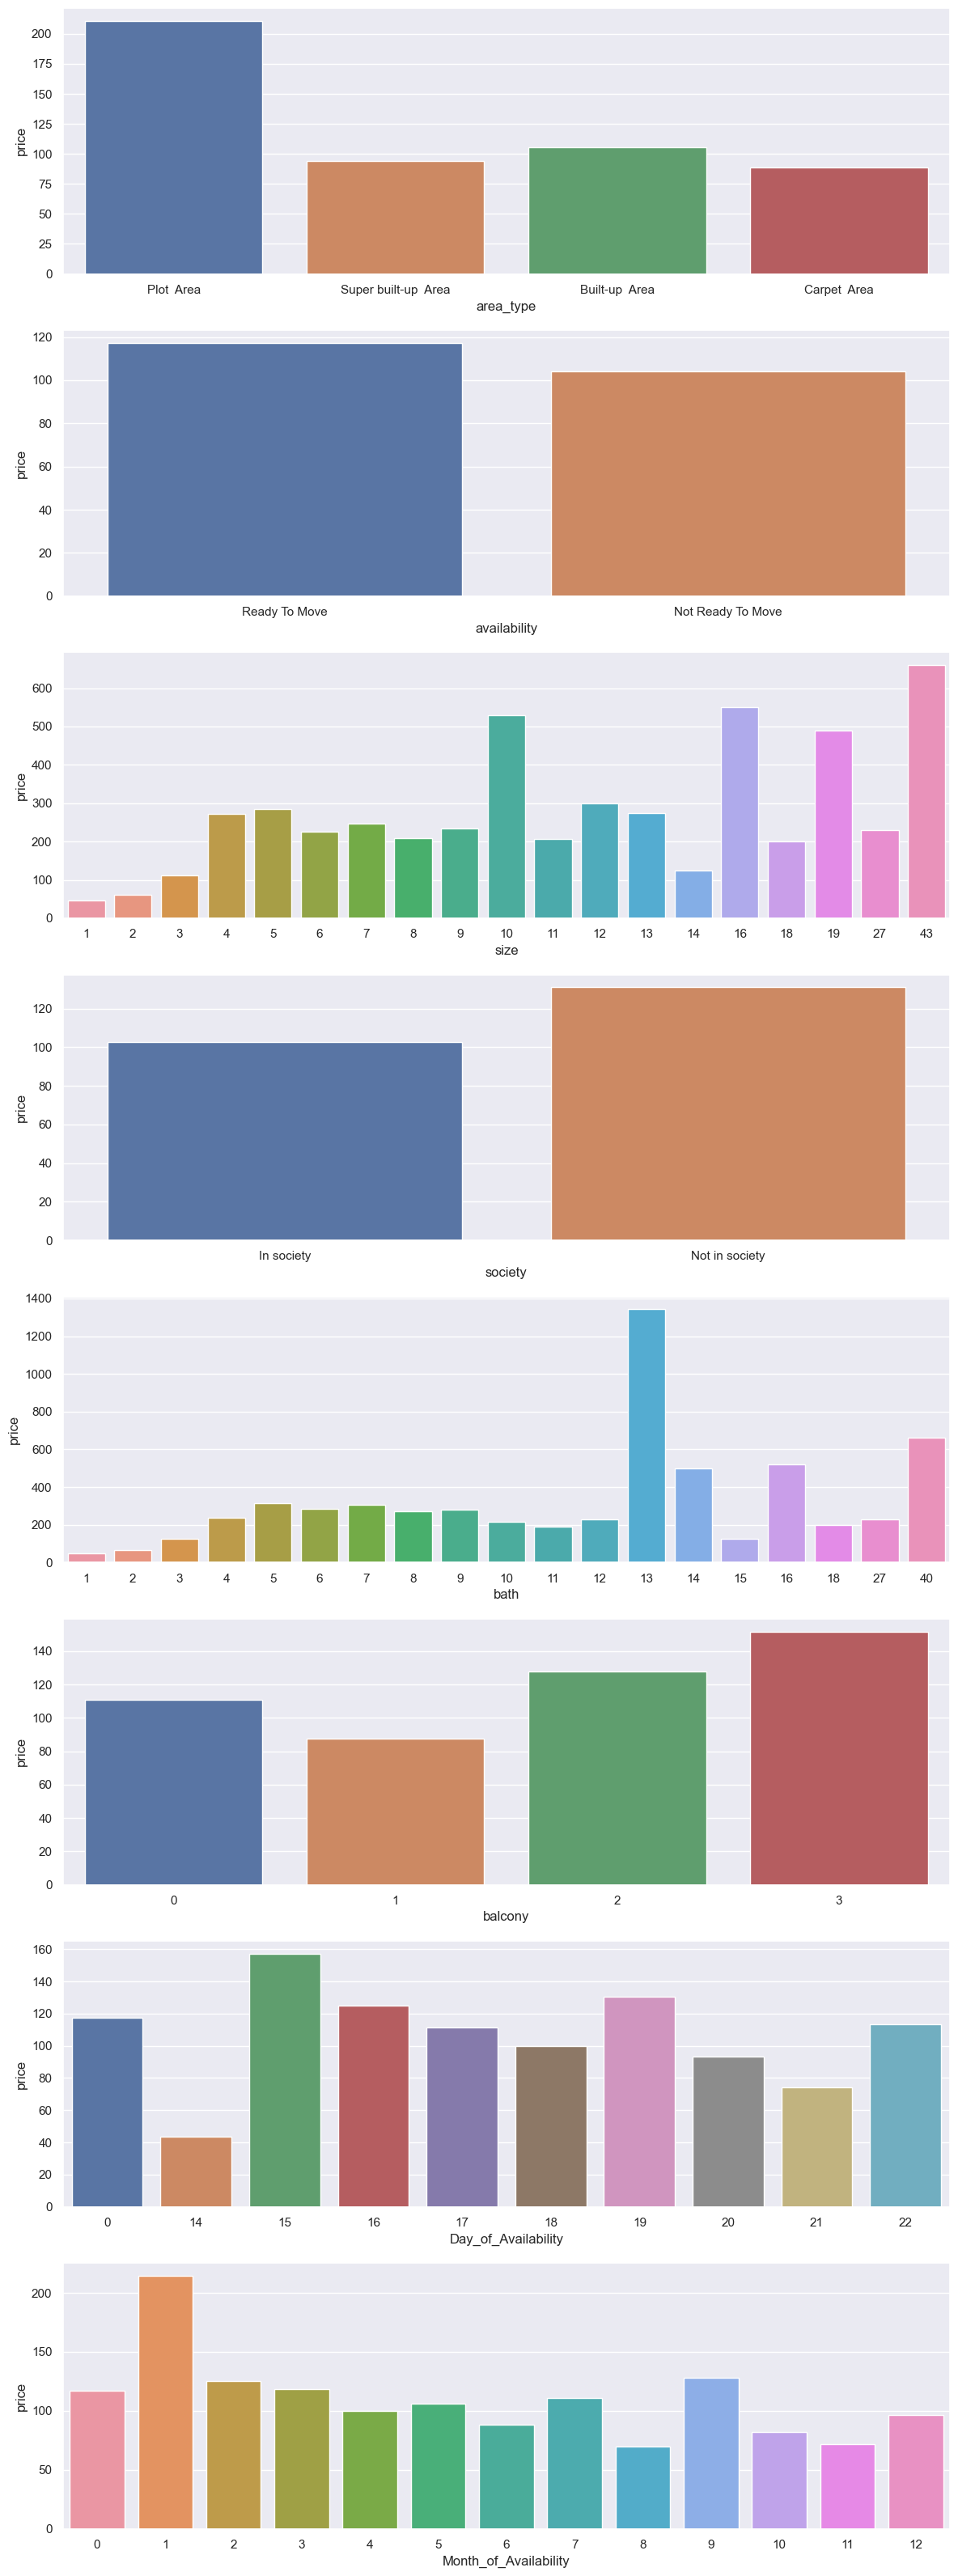

In [81]:
plt.figure(figsize = (12, 32))
x = 1

for column in cat_cols:
    plt.subplot(8, 1, x)
    sns.barplot(eda_df[column], eda_df['price'], ci = None)
    x += 1

plt.tight_layout()

###### Conclusions:
###### 1. Area_type vs Price: Plot area is the most expensive area type. Super built-up area being less expensive can be a reason for it being common.
###### 2. Availability vs Price: Those who are ready to move have to pay a greater amount compared to those who aren't available. This may be because people of 'Ready to Move' category might have urgent need of moving and those from the other category might wait for reduced price.
###### 3. Size vs Price: A regular increasing trend is expected here with price increasing with the no. of bedrooms, but this is a bit irregular. It may be due to dynamic pricing and price depending on other factors as well.
###### 4. Society vs Price: It is observed that properties in society are less expensive than those not in societies. This may be due to people owning expensive bungalows outside societies, but if we compare among flats generally those which are in some society are more expensive.
###### 5. Bath vs Price: Similar to size, a regular increasing trend is expected here, but it is a bit irregular. Properties with 13 bathrooms are found to be most expensive.
###### 6. Balcony vs Price: An increasing trend is expected here as well and it is increasing with properties with 3 balconies being the most expensive. However, those with 1 balcony are cheaper compared to those with none.
###### 7. Day_of_Availability vs Price: 15th day of the month is the most expensive for moving into properties. But in general, those who are ready to move have to pay a greater amount.
###### 8. Month_of_Availability vs Price: January is an unusually costly month for moving into properties and Ausgust is the cheapest.

### Numeric columns

<AxesSubplot:xlabel='total_sqft', ylabel='price'>

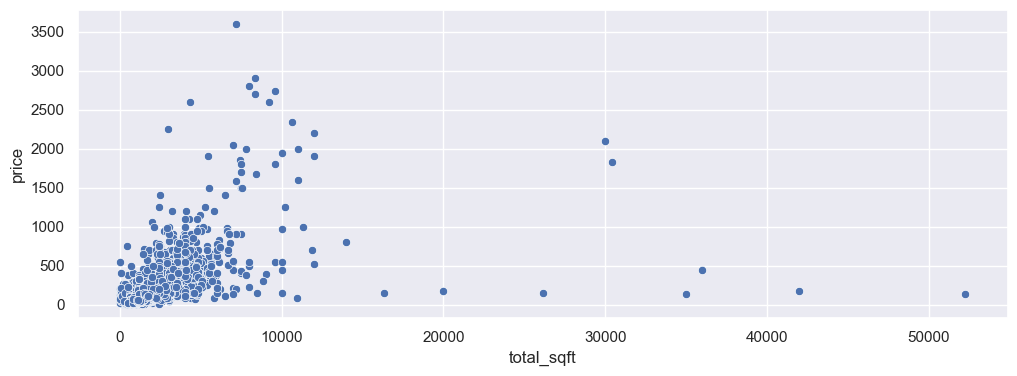

In [82]:
plt.figure(figsize = (12, 4))
sns.scatterplot(eda_df['total_sqft'], eda_df['price'])

###### Conclusion: We can see that price has a mostly positive correlation with total_sqft and price generally increases with area in sq. ft. But after a certain threshold price seems to be showing no correlation with total_sqft.

## Multivariate Analysis

### Total_sqft, Price and Society columns

<AxesSubplot:xlabel='total_sqft', ylabel='price'>

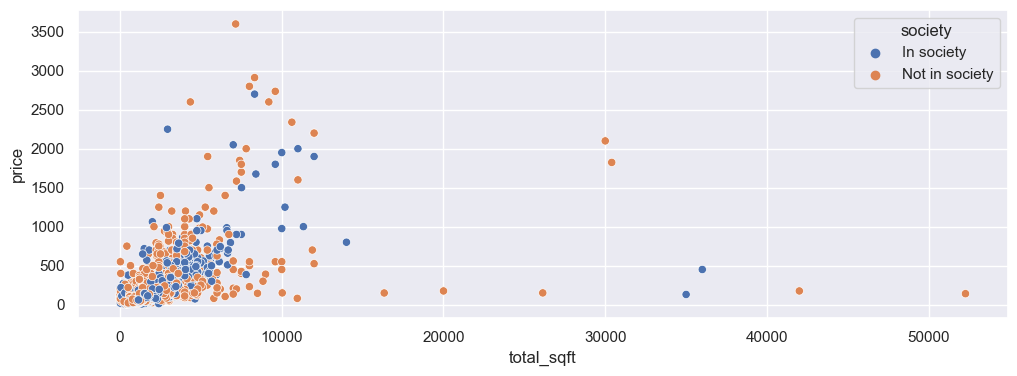

In [83]:
plt.figure(figsize = (12, 4))
sns.scatterplot(eda_df['total_sqft'], eda_df['price'], hue = eda_df['society'])

###### We can see that for properties in society, price seems to be having a generally positive correlation with total_sqft. However, this is not the case with those not in society. People may have bought huge lands with high areas in sqft outside societies at a cheap price which isn't possible in societies.

### Heatmap for checking Multicollinearity

<AxesSubplot:>

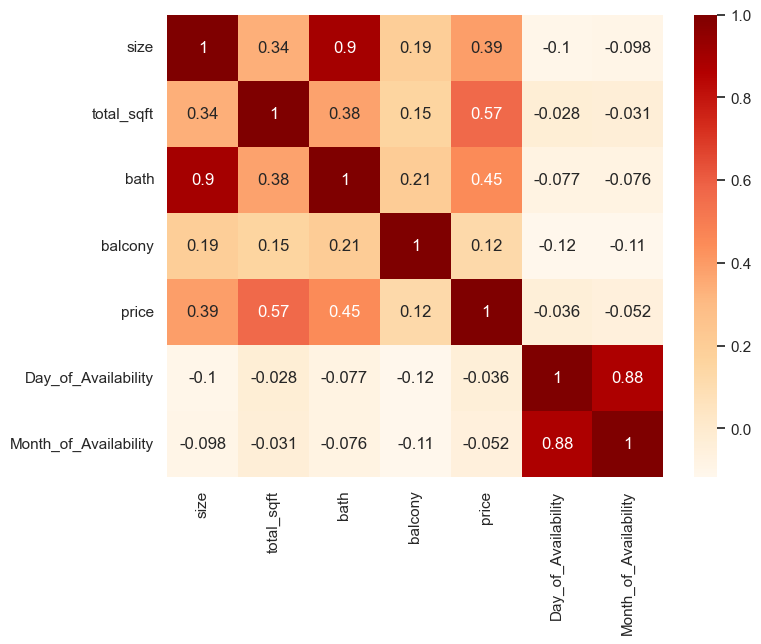

In [84]:
plt.figure(figsize = (8, 6))
sns.heatmap(eda_df.corr(), annot = True, cmap = 'OrRd')

###### We can see that 2 pairs of columns have a very strong correlation between them.
###### 1. Size and Bath columns: These have a very high correlation of 0.9 and one of them should be dropped. Size can be dropped because it is less correlated to price(0.39) compared to bath(0.45).
###### 2. Day and Month of Availability: These also have a very high correlation of 0.88 and Day_of_Availability is chosen to be dropped because of less magnitude of correlation(-0.036) with price.

In [85]:
eda_df.drop(['size', 'Day_of_Availability'], inplace = True, axis = 1)

In [86]:
eda_df.drop_duplicates(inplace = True)

In [87]:
eda_df.shape

(12448, 9)

###### With this, we are done with EDA and will move to modelling.

In [88]:
eda_df.to_csv('Bengaluru_House_Data_EDA.csv', index = False)  # Exporting dataset to a different csv file for modelling